<a href="https://colab.research.google.com/github/m1key/keras-sandbox/blob/master/who.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Data from https://www.kaggle.com/szamil/who-suicide-statistics
# Based on https://www.kaggle.com/rushal/who-suicide-analysis
from google.colab import files
uploaded = files.upload()

In [8]:
import io

df = pd.read_csv(io.BytesIO(uploaded['who_suicide_statistics.csv']))


df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [9]:
df.shape

(43776, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [0]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
gender_coder = {'female':0,'male':1}

In [0]:
df['age_encoder'] = df['age'].map(age_coder)
df['sex_encoder'] = df['sex'].map(gender_coder)

In [17]:
df.head()

,country,year,sex,age,suicides_no,population,age_encoder,sex_encoder
0,Albania,1985,female,15-24 years,NaN,277900.0,1,0
1,Albania,1985,female,25-34 years,NaN,246800.0,2,0
2,Albania,1985,female,35-54 years,NaN,267500.0,3,0
3,Albania,1985,female,5-14 years,NaN,298300.0,0,0
4,Albania,1985,female,55-74 years,NaN,138700.0,4,0


In [20]:
df.suicides_no.fillna(0,inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,age_encoder,sex_encoder
0,Albania,1985,female,15-24 years,0.0,277900.0,1,0
1,Albania,1985,female,25-34 years,0.0,246800.0,2,0
2,Albania,1985,female,35-54 years,0.0,267500.0,3,0
3,Albania,1985,female,5-14 years,0.0,298300.0,0,0
4,Albania,1985,female,55-74 years,0.0,138700.0,4,0


In [0]:
suicide = df.groupby('age_encoder')[['suicides_no']].sum()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Number of Suicide')

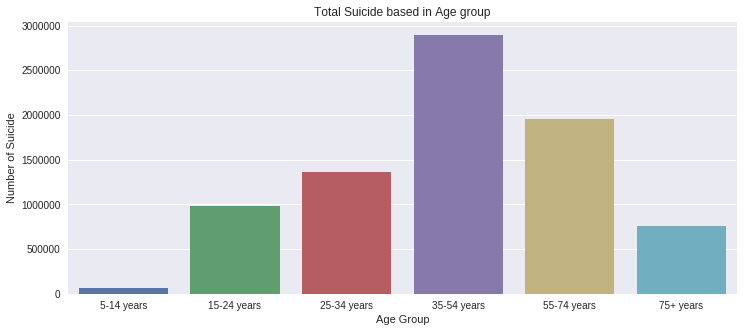

In [107]:
en = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
gen = {0:'female',1:'male'}

suicide.head()
plt.figure(figsize=(12,5))
sns.barplot(x=suicide.index.map(en.get),y=suicide.suicides_no)
plt.title("Total Suicide based in Age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Suicide")

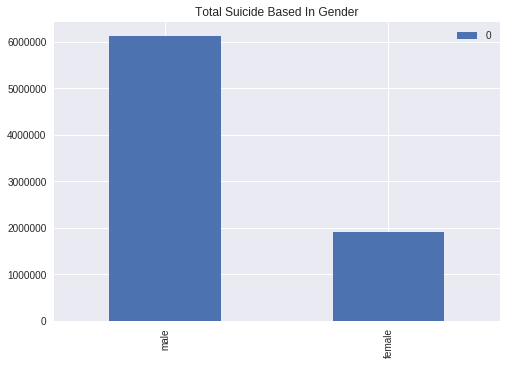

In [119]:
male_suicide = df[df.sex_encoder == 1]['suicides_no'].values.sum()
female_suicide = df[df.sex_encoder == 0]['suicides_no'].values.sum()

age_differance = pd.DataFrame([male_suicide,female_suicide],index=['male','female'])
age_differance.head()
age_differance.plot(kind='bar',title="Total Suicide Based In Gender")
plt.legend()

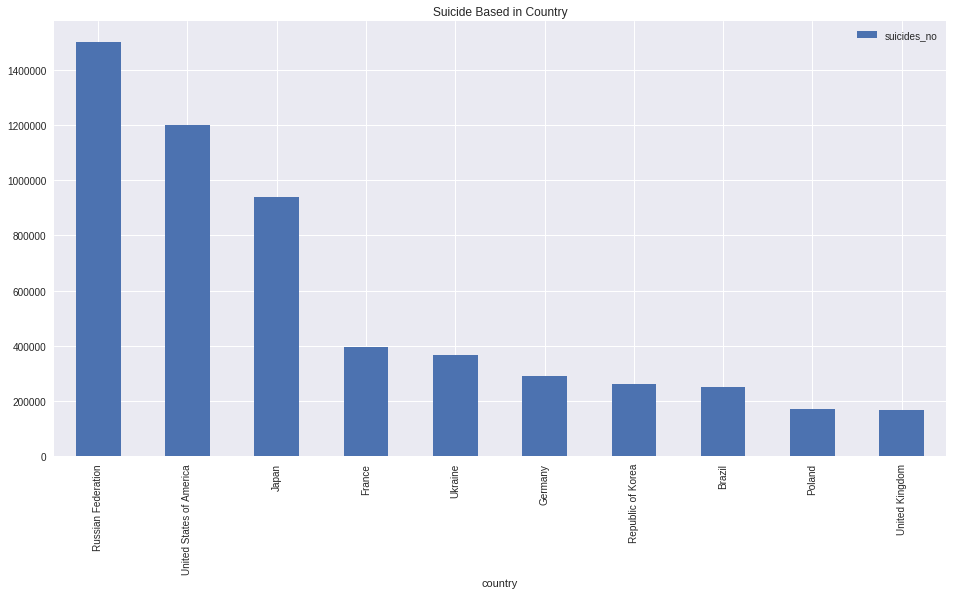

In [82]:
plt.figure(figsize=(14,6))
df.groupby('country').sum().sort_values(by='suicides_no',ascending=False)[['suicides_no']][:10].plot(kind='bar',figsize=(16,8),title='Suicide Based in Country')

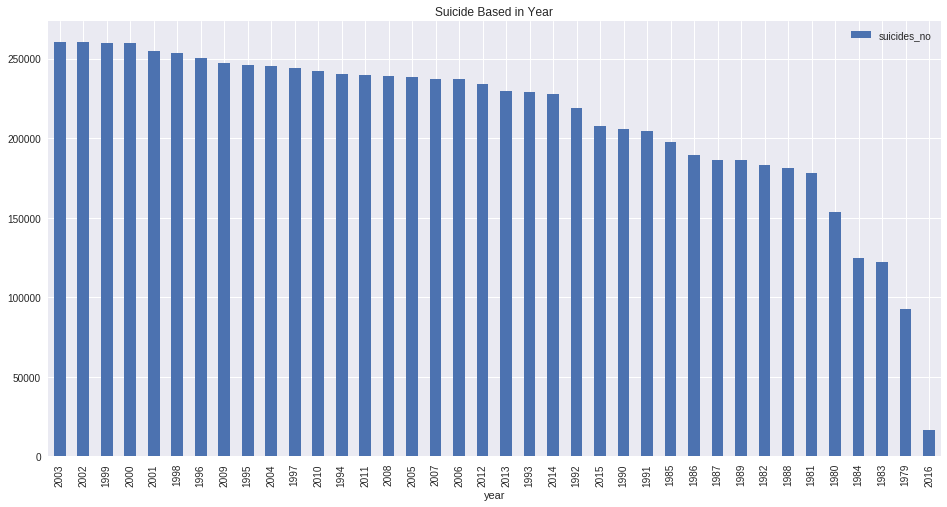

In [83]:
df.groupby("year").sum().sort_values(by='suicides_no',ascending=False)[['suicides_no']].plot(kind='bar',figsize=(16,8),title='Suicide Based in Year')

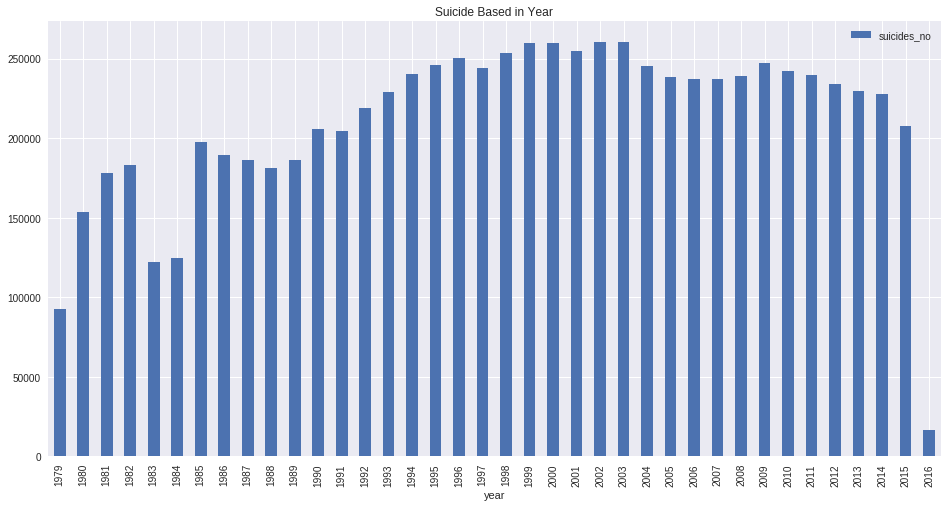

In [52]:
grouped = df.groupby('year').sum().reset_index()
grouped.sort_values('year', ascending=True).set_index('year')[['suicides_no']].plot(kind='bar',figsize=(16,8),title='Suicide Based in Year')

In [0]:
suicide_data = df.groupby(['year','age']).sum()['suicides_no'].reset_index()

Text(0,0.5,'Suicide Number')

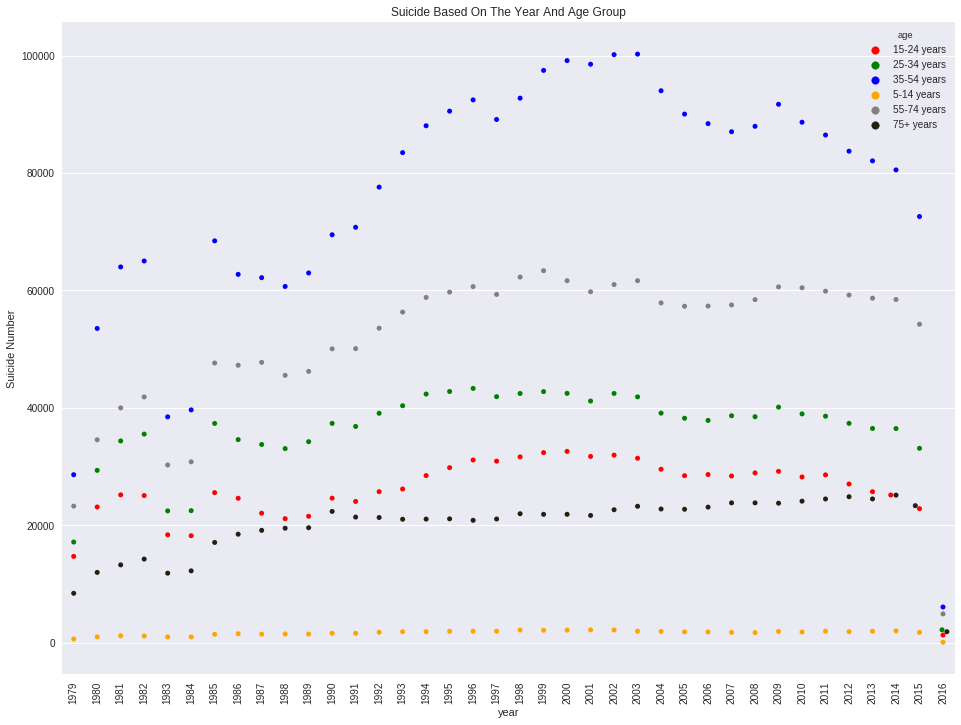

In [85]:
color=['red','green','blue','orange','gray','#222111']
plt.figure(figsize=(16,12))
sns.swarmplot(x='year',y='suicides_no',hue='age',data=suicide_data,palette=color)
plt.title("Suicide Based On The Year And Age Group")
plt.xticks(rotation=90)
plt.ylabel("Suicide Number")

In [86]:
suicide_country_age = df.groupby(['country','age']).sum()['suicides_no'].reset_index()
suicide_country_age.head()

,country,age,suicides_no
0,Albania,15-24 years,546.0
1,Albania,25-34 years,427.0
2,Albania,35-54 years,591.0
3,Albania,5-14 years,61.0
4,Albania,55-74 years,264.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Number of Suicide')

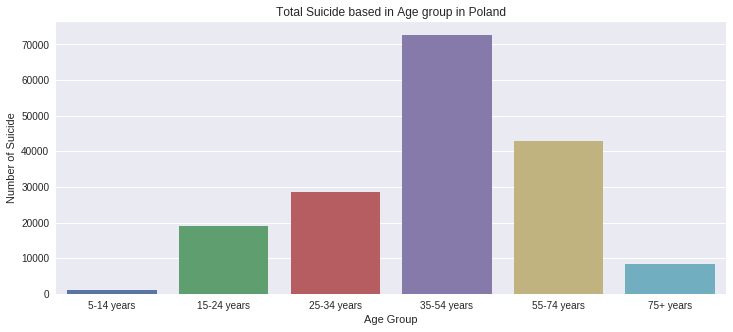

In [115]:
country = 'Poland'
df_country = suicide_country_age.loc[suicide_country_age['country'] == country]#.reset_index()

df_country = df_country.reset_index(drop=True)
df_country['age_encoder'] = df_country['age'].map(age_coder)
df_country = df_country.set_index('age_encoder')
df_country = df_country.sort_index()

plt.figure(figsize=(12,5))
sns.barplot(x=df_country.index.map(en.get),y=df_country.suicides_no)
plt.title("Total Suicide based in Age group in " + country)
plt.xlabel("Age Group")
plt.ylabel("Number of Suicide")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0,0.5,'Number of Suicide')

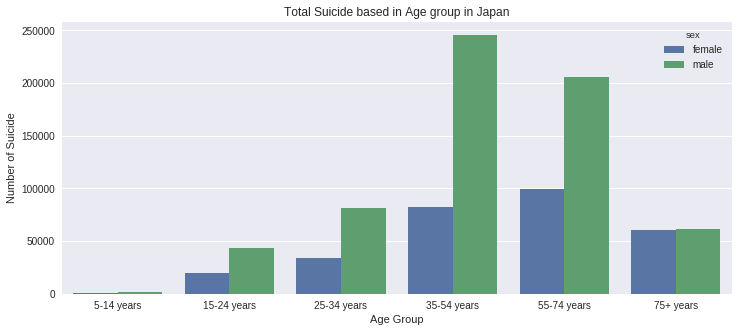

In [126]:
suicide_country_age = df.groupby(['country','age', 'sex']).sum()['suicides_no'].reset_index()

country = 'Japan'
df_country = suicide_country_age.loc[suicide_country_age['country'] == country]#.reset_index()


#df_country = df_country.reset_index(drop=True)
df_country['age_encoder'] = df_country['age'].map(age_coder)

df_country = df_country.set_index('age_encoder')
df_country = df_country.sort_index()
df_country.head()


plt.figure(figsize=(12,5))
sns.barplot(x=df_country.index.map(en.get),hue=df_country.sex, y=df_country.suicides_no)
plt.title("Total Suicide based in Age group in " + country)
plt.xlabel("Age Group")
plt.ylabel("Number of Suicide")

In [71]:
suicide_country_age['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

Text(0.5,1,'Suicide Based On The Country and Age')

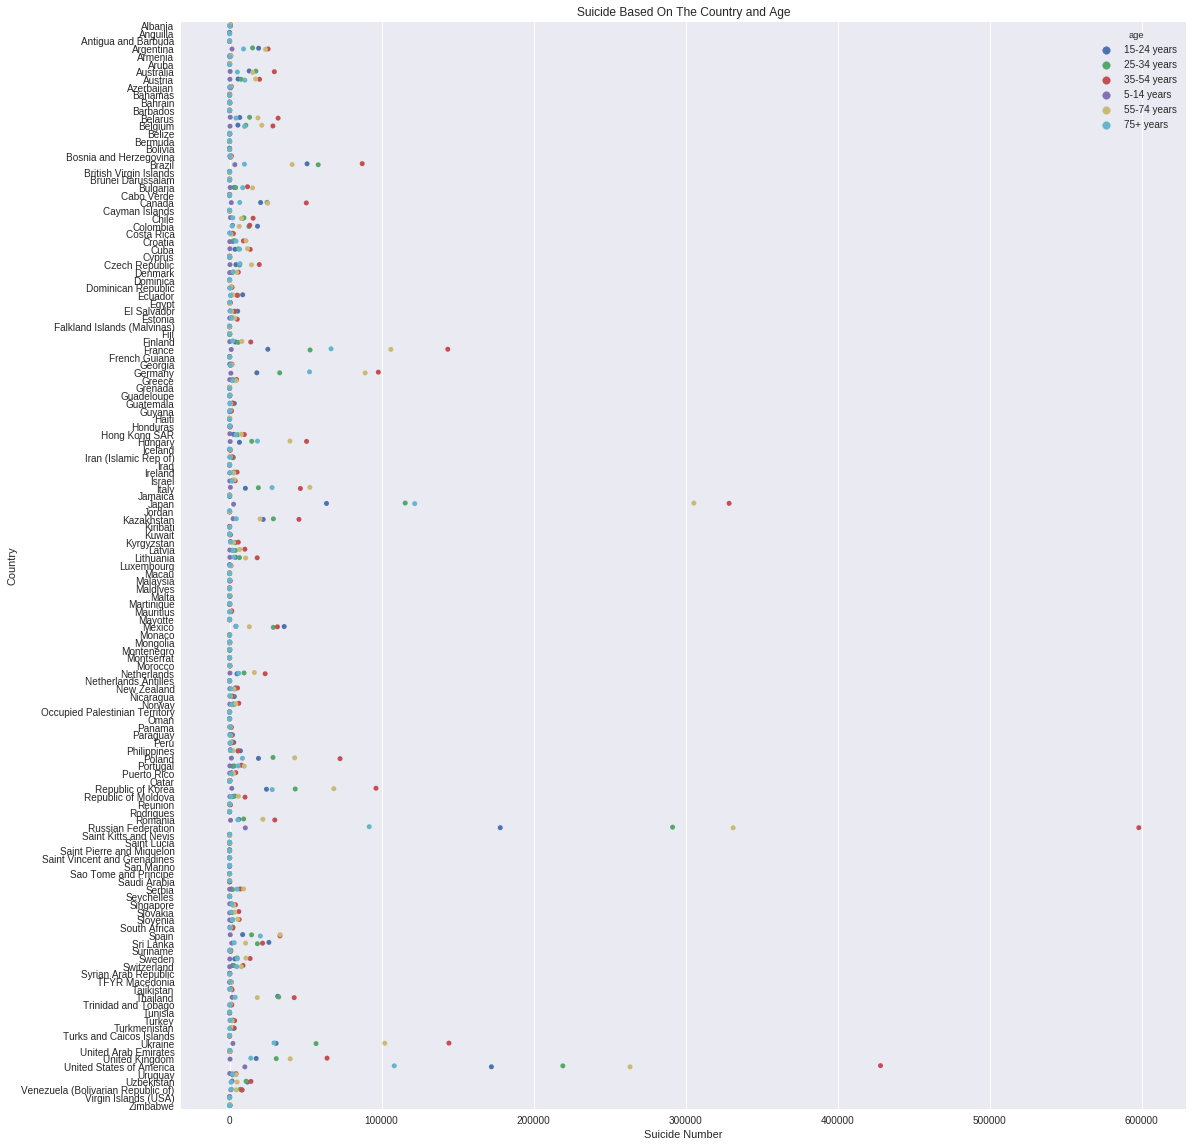

In [78]:
plt.figure(figsize=(18,20))
sns.stripplot(x='suicides_no',y='country',hue='age',data=suicide_country_age,jitter=True)
plt.ylabel("Country")
plt.xlabel("Suicide Number")
plt.title('Suicide Based On The Country and Age')